In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

## SCFT15 Co-CNT-Co Dot (leads 13-15)

A second set of data from this same device to try to find a region showing some quantum dot behavior.

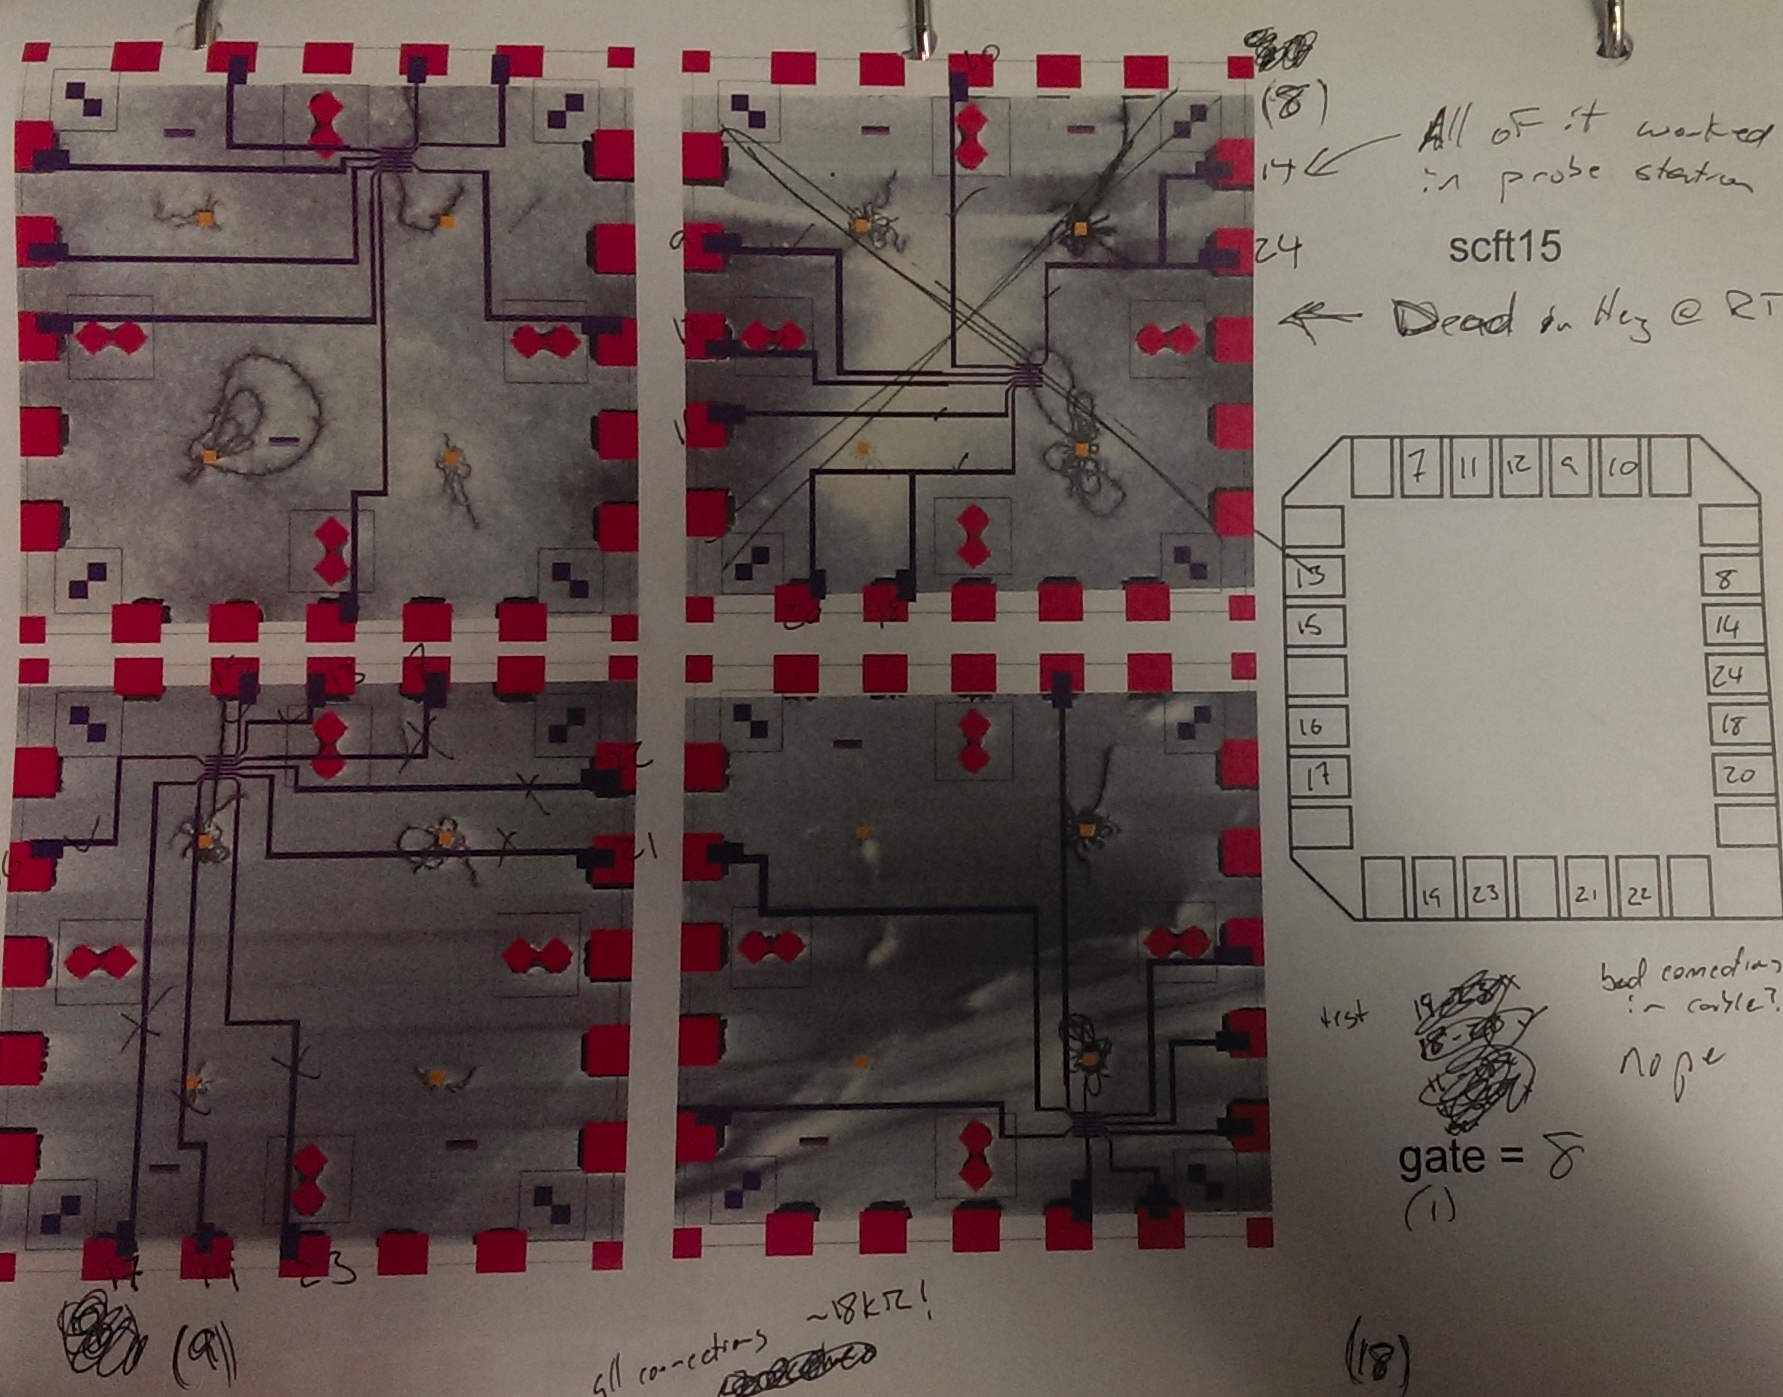

In [3]:
from IPython.display import Image, display

fig_dir = '/Volumes/EDDropbox/Data/SCFT15/figures/'
display(Image(filename=os.path.join(fig_dir,'scft15.jpg')))

In [5]:
data_dir = '/Volumes/EDDropbox/Data/SCFT15/4K/'
f = os.path.join(data_dir, 'gate-check_13-15_d.bin')
data = np.fromfile(f, '>d')

In [6]:
data = data.reshape((-1, data[0]))

In [7]:
gate = data[:,1]

In [8]:
current = data[:,2]

The current versus gate data did not turn out to be very interesting.

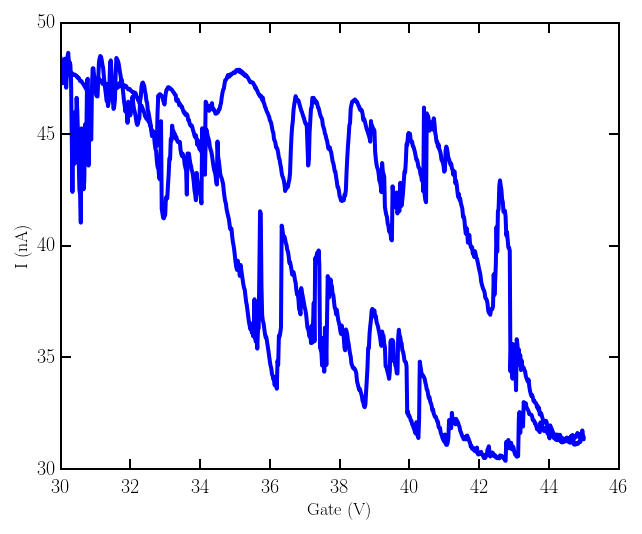

In [9]:
plt.plot(gate, current*1e9, 'b-')
plt.xlabel('Gate (V)'); plt.ylabel('I (nA)')

In [11]:
f = os.path.join(data_dir, 'VI-gate_13-15_e.bin')
data = np.fromfile(f, '>d')

In [12]:
data = data.reshape((-1, data[0]))

In [13]:
bias = data[0,1:]

In [14]:
gate = data[1:,0]

In [15]:
current = data[1:,1:]

Here's the first few IV curves to get an idea what they look like.

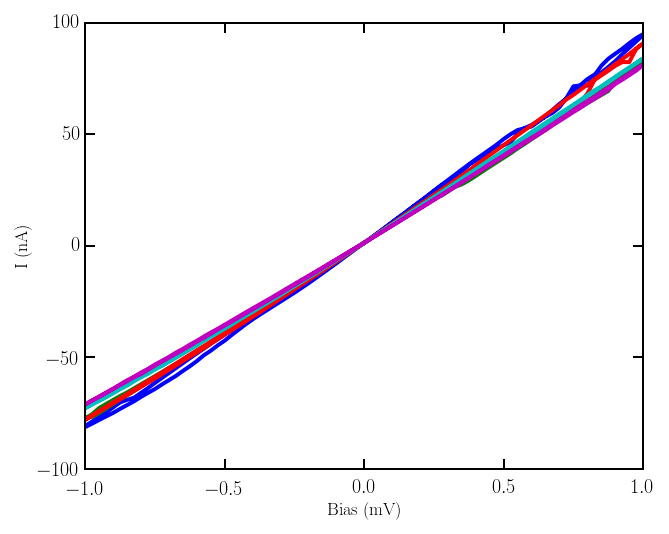

In [16]:
plt.plot(bias*1e3, current[0:5,:].transpose()*1e9)
plt.xlabel('Bias (mV)'); plt.ylabel('I (nA)')

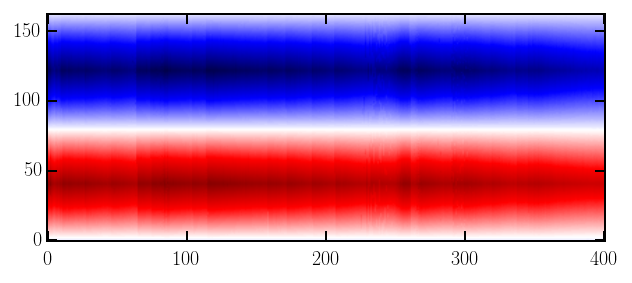

In [19]:
plt.imshow(current.transpose(), origin = 'lower', cmap = plt.cm.seismic)

In [20]:
n = data[0,0]; print n

164.0


In [21]:
avgcurrent = (np.append(current[:,3*n/4 - 1:n-2],current[:,0:n/4], axis=1) + current[:,n/4:3*n/4 - 1][:,::-1])/2
avgcurrent = avgcurrent.transpose()

Here is the current as a function of the gate and bias.

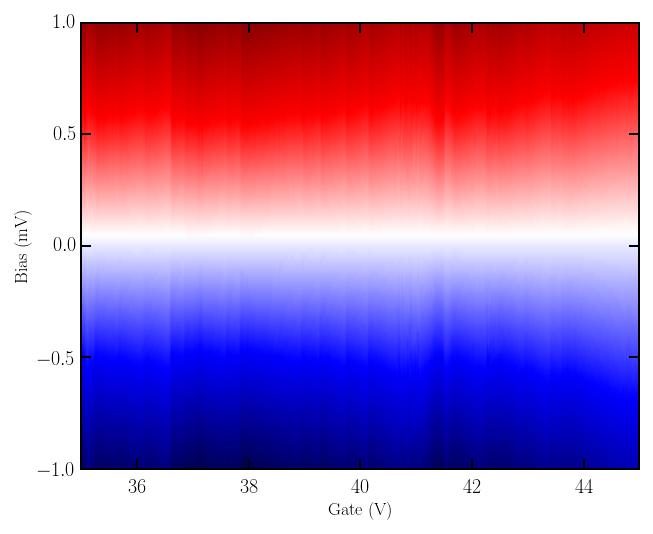

In [24]:
plt.imshow(avgcurrent, origin = 'lower', extent = [35,45, -1, 1], cmap = plt.cm.seismic, aspect = 'auto')
plt.xlabel('Gate (V)'); plt.ylabel('Bias (mV)')

And the plot of the conductance versus gate and bias.

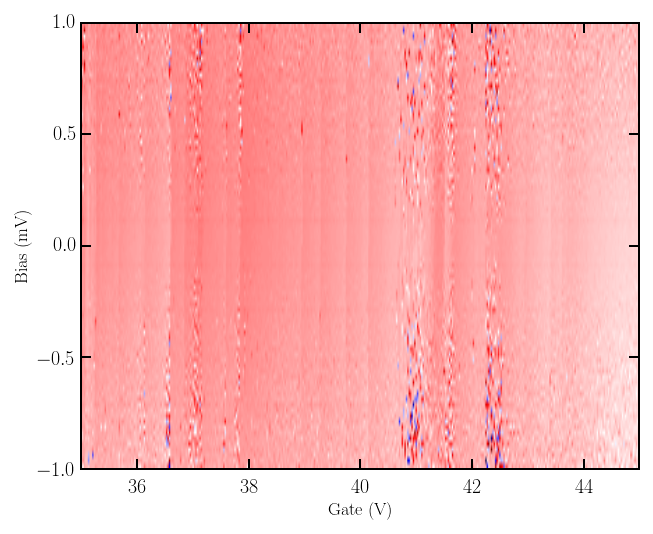

In [23]:
cond = np.diff(avgcurrent, axis = 0)
plt.imshow(cond, origin = 'lower', extent = [35,45, -1, 1], cmap = plt.cm.seismic, aspect = 'auto')
plt.xlabel('Gate (V)'); plt.ylabel('Bias (mV)')